In [1]:
from create_data import DumbCirc as dc
from dklsuq import DeepKernelSUQ as dklu
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 26)
fc, pc, tc = data_instance.create_dataset(2, 2, [50], [0.2], True)

In [3]:
import torch
torch.manual_seed(22)
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

In [4]:
model = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model.set_device(device)

In [6]:
model.set_test_data(tc)

In [7]:
model.train_without_mapping(num_epochs=1, batch_size=4, learning_rate=0.001)

encoding:  tensor([[3.1777, 4.2409, 1.9546,  ..., 3.1166, 4.6308, 3.0712],
        [2.2470, 0.9820, 1.6094,  ..., 2.2948, 0.3894, 1.6073],
        [3.1777, 4.2409, 1.9546,  ..., 3.1166, 4.6308, 3.0712],
        [2.2470, 0.9820, 1.6094,  ..., 2.2948, 0.3894, 1.6073]],
       grad_fn=<ViewBackward0>)
gpy:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], grad_fn=<ExpBackward0>)
posterior:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        ...,
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan],
        [nan, nan, nan,  ..., nan, nan, nan]], grad_fn=<SubBackward0>)
gpy:  tensor([[nan, nan, nan,  ..., nan, nan, nan],
  

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dklsuq.py:137: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724788960438/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  + posterior_mean.T @ torch.linalg.inv(posterior_var) @ posterior_mean)


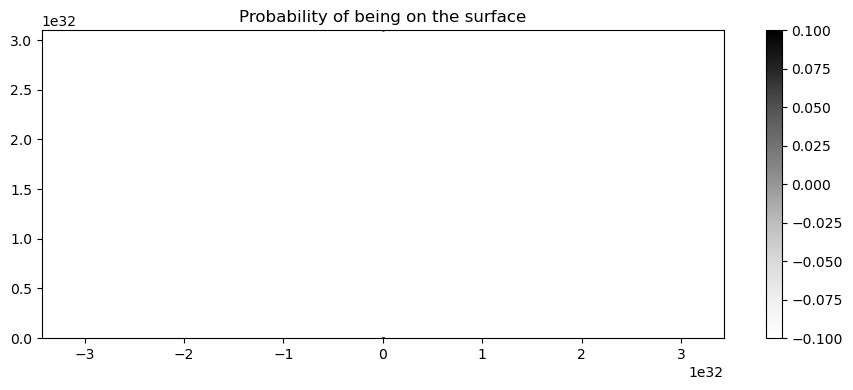

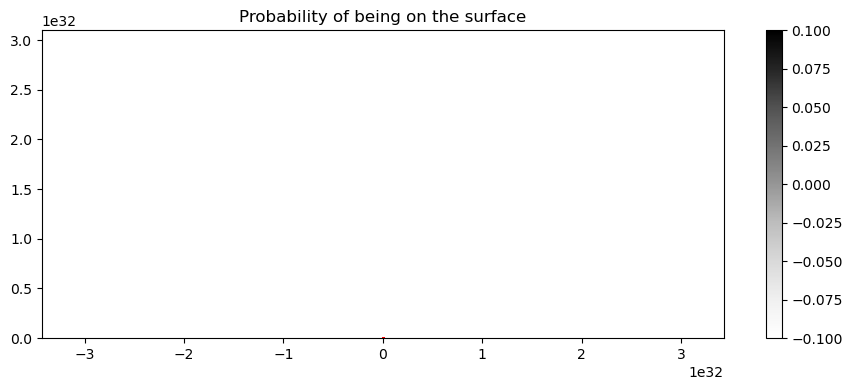

In [8]:
model.predict()

In [9]:
model.set_test_data(pc[:2, :])

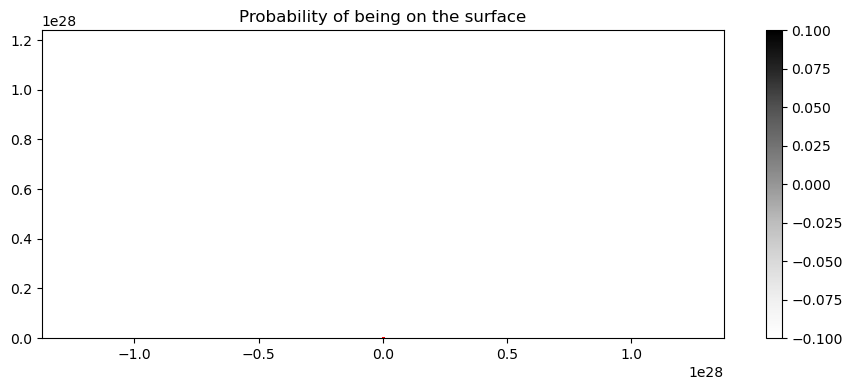

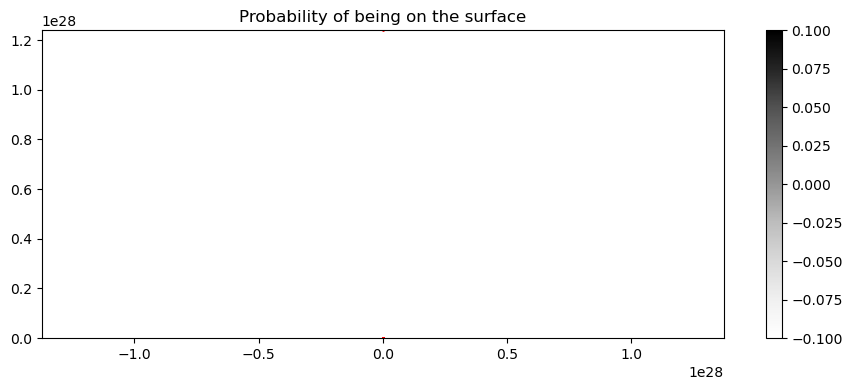

In [10]:
model.predict()